### Cargamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 

## Cargamos los datos

In [2]:
url = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv"
data = pd.read_csv(url)
data.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2020-05-25,2020-05-29,2020-06-01,2020-06-05,2020-06-08,2020-06-12,2020-06-15,2020-06-19,2020-06-23,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,525.0,596.0,653.0,806.0,904.0,1046.0,1176.0,1371.0,1533.0,619.3
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,3.0,9.0,10.0,397.6
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN


## Cantidad total por comuna.

In [3]:
def anotate(X,Y):
    for i in range(len(X)):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i],Y[i]),
            xytext =(0, 1),
            textcoords="offset points",
            ha ='center', va='bottom')

def cantidad_total_comuna(searchregion):
    region = data[data["Region"]== searchregion]
    fecha  = data.columns[len(data.columns)-2]
    X = region["Comuna"].to_list()
    Y = region[fecha].to_list()
    
    plt.figure(figsize=(15,10))
    plt.title("Total de casos por comuna para la región: " + str(searchregion) + ". Fecha: " + fecha )
    plt.bar(X,Y)
    plt.xticks(rotation=90)
    anotate(X,Y)
    plt.show()

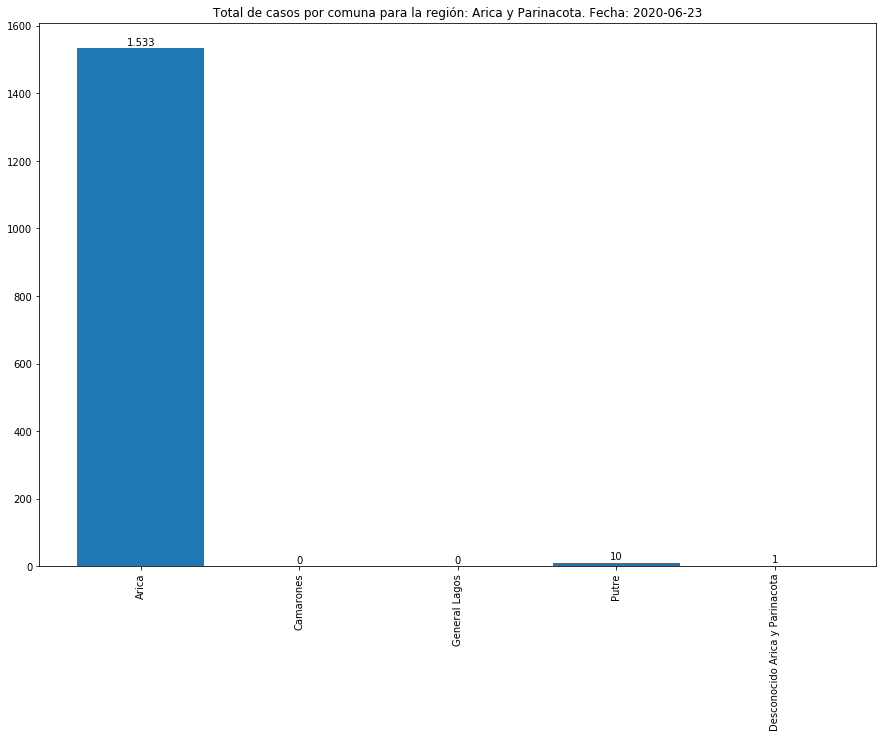

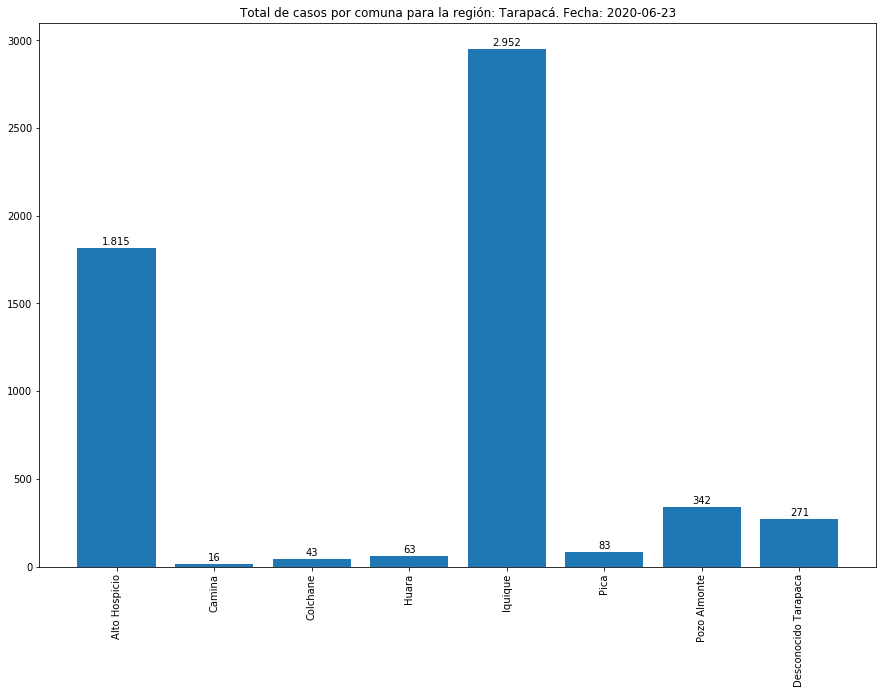

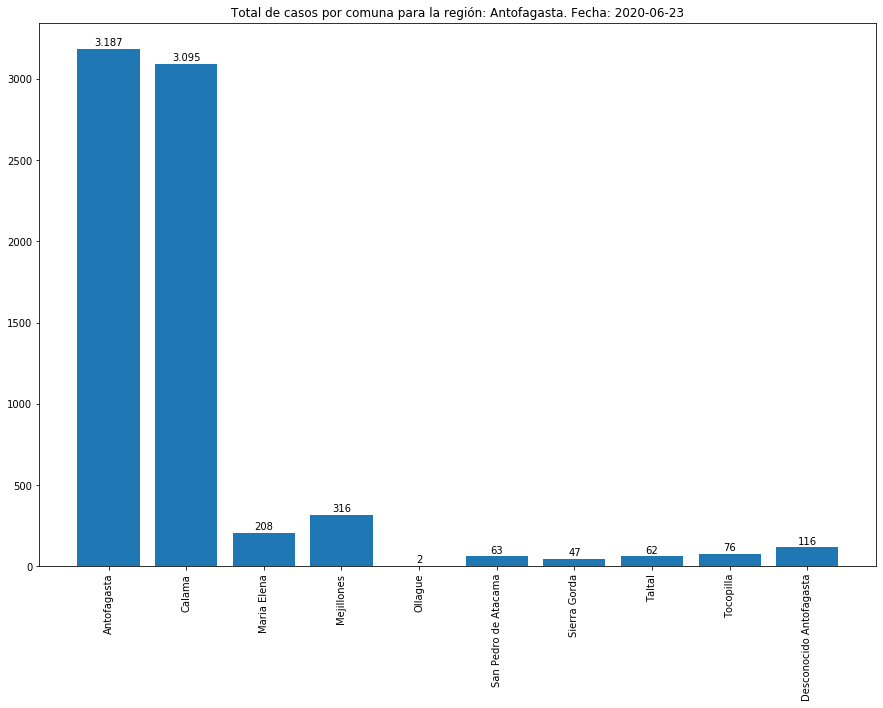

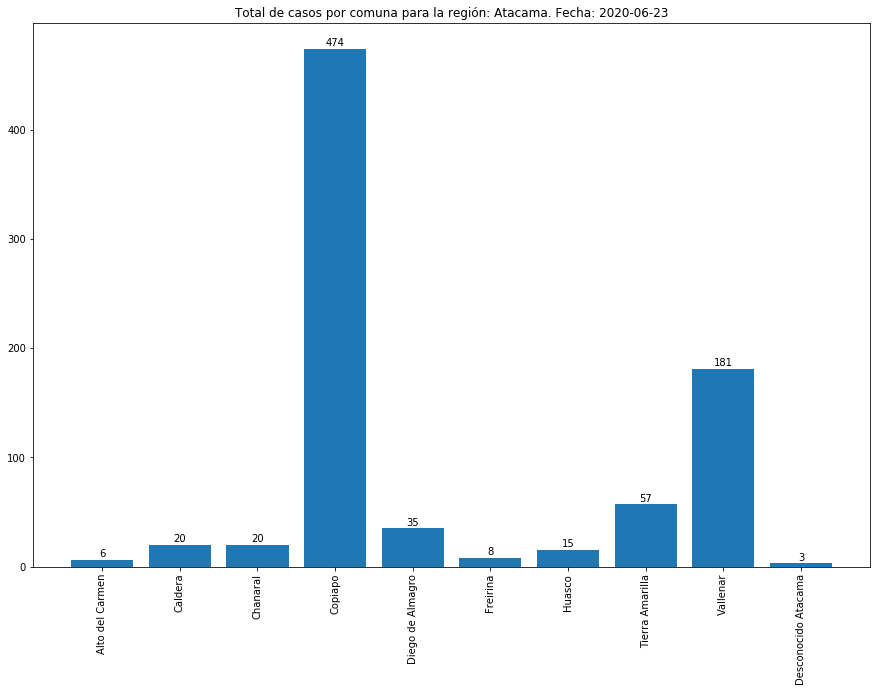

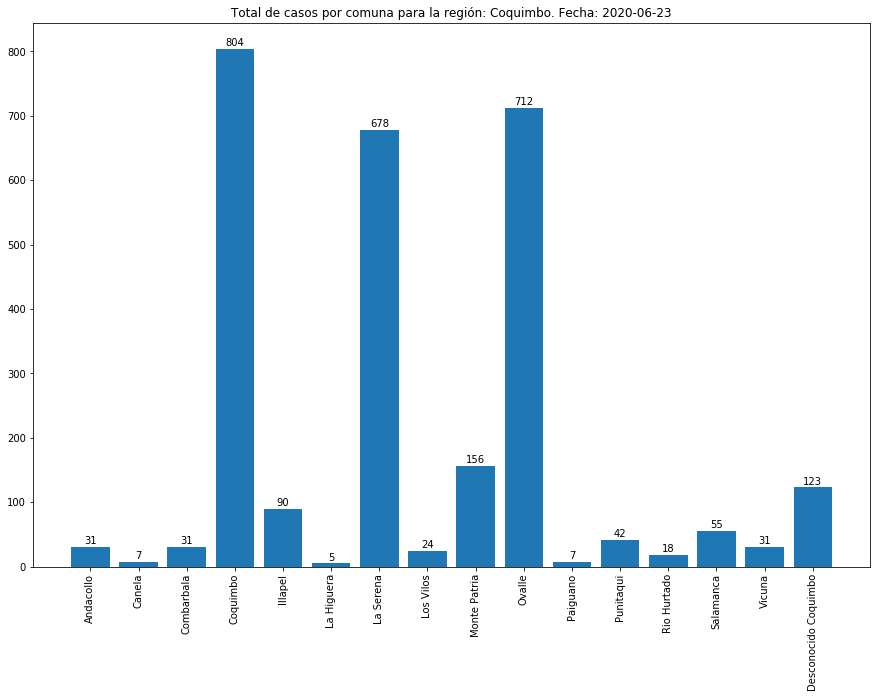

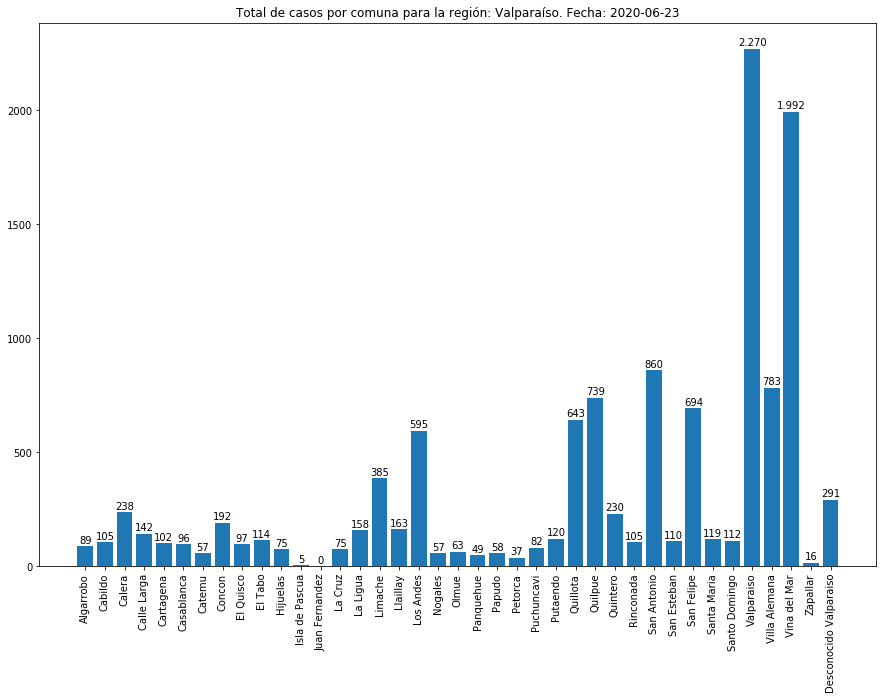

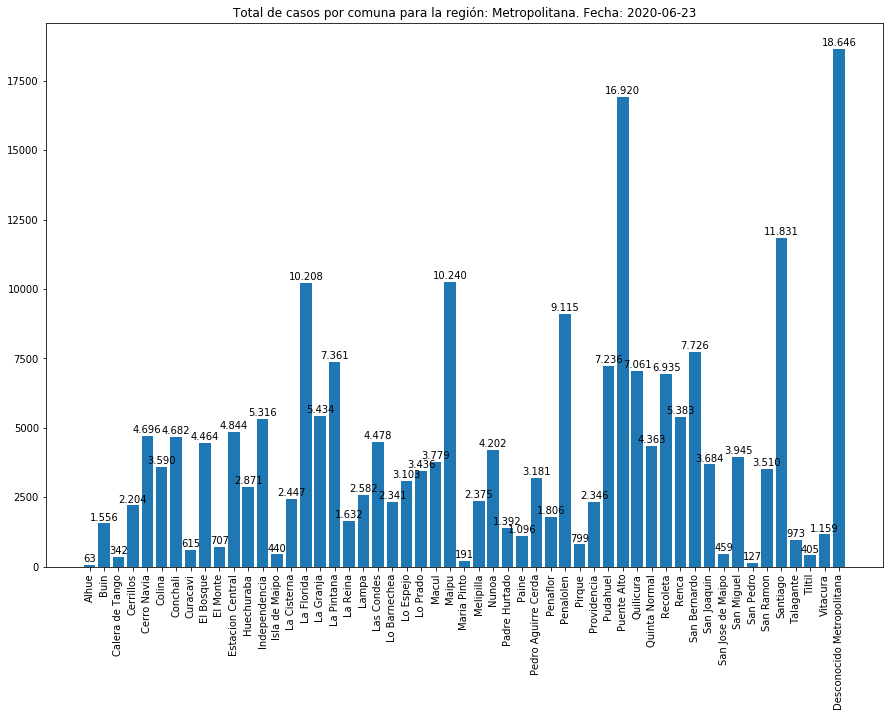

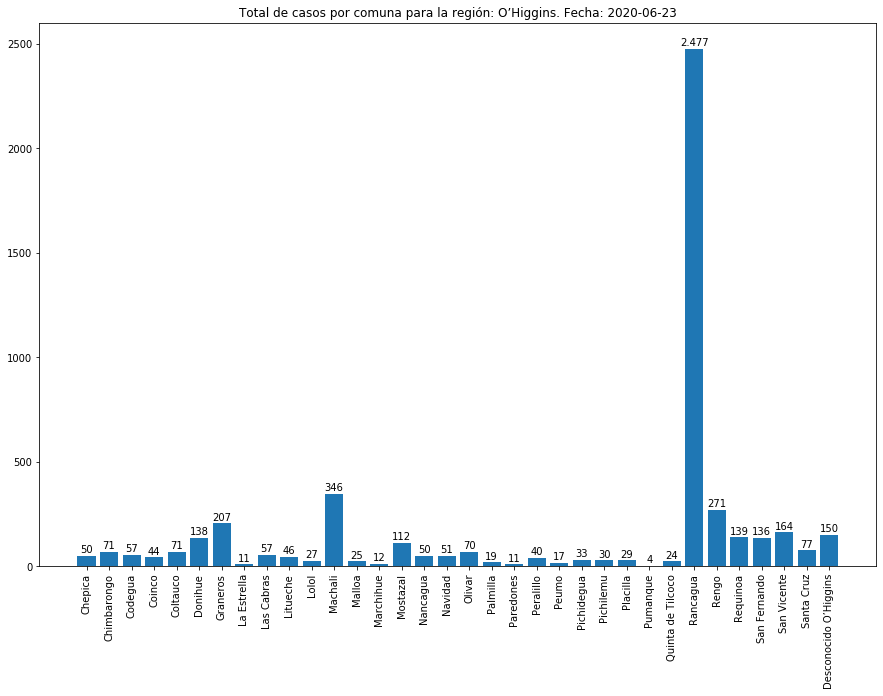

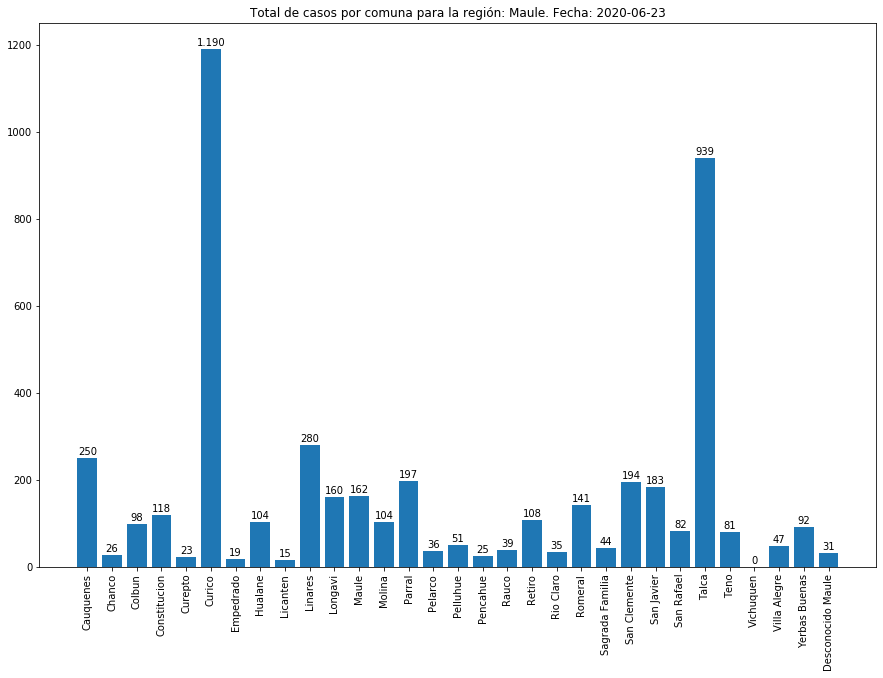

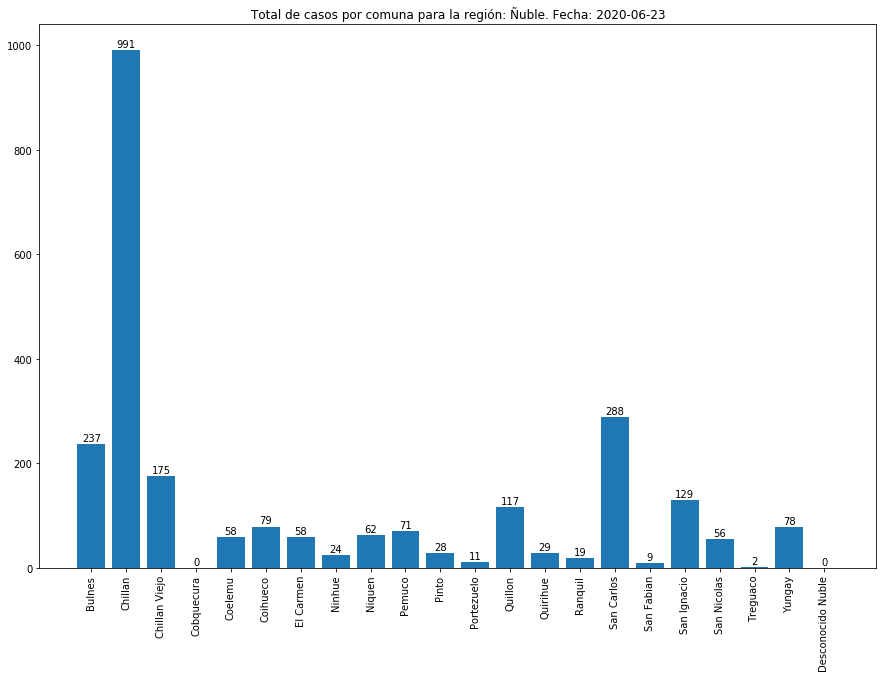

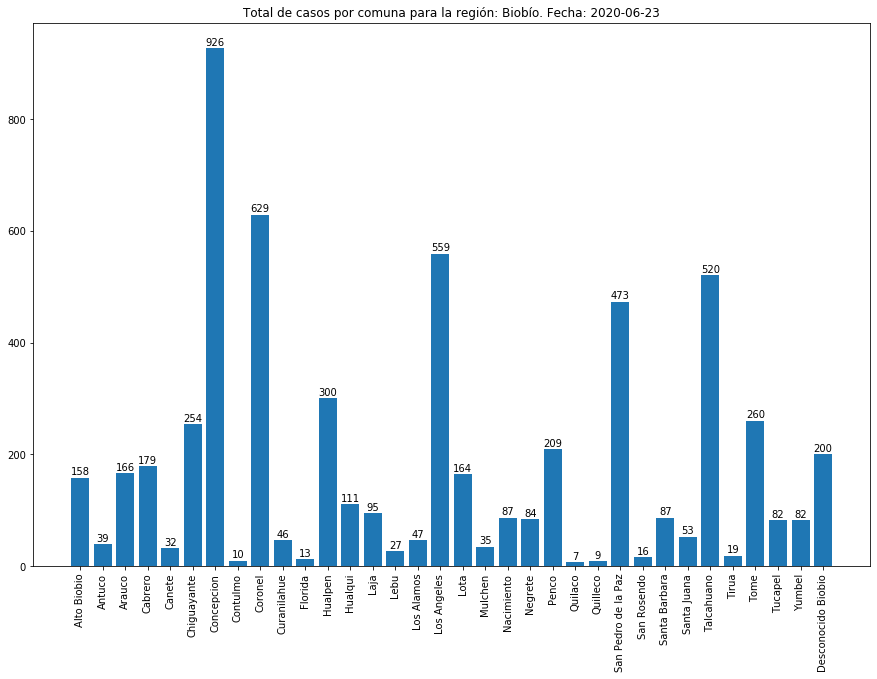

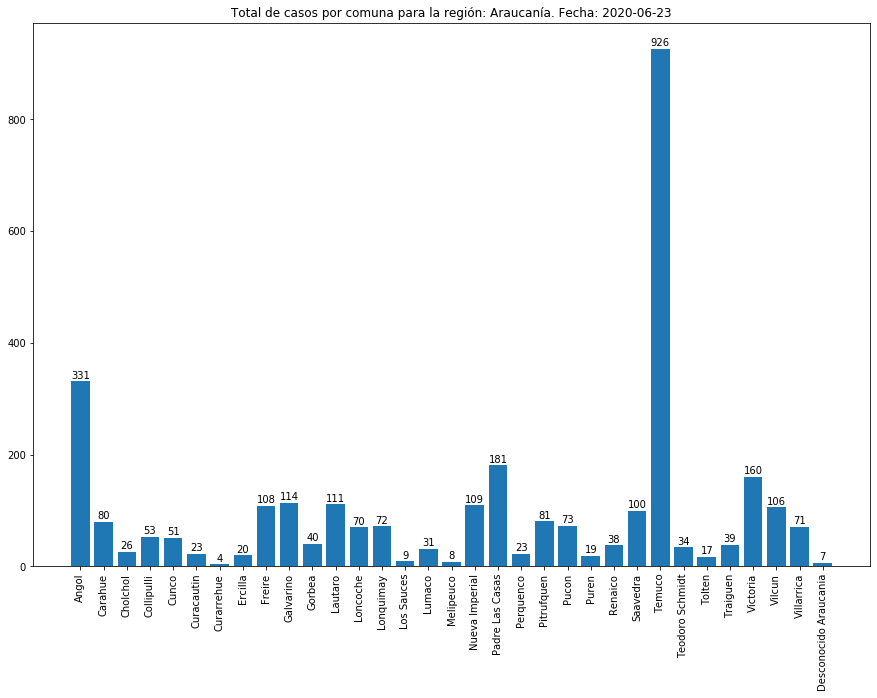

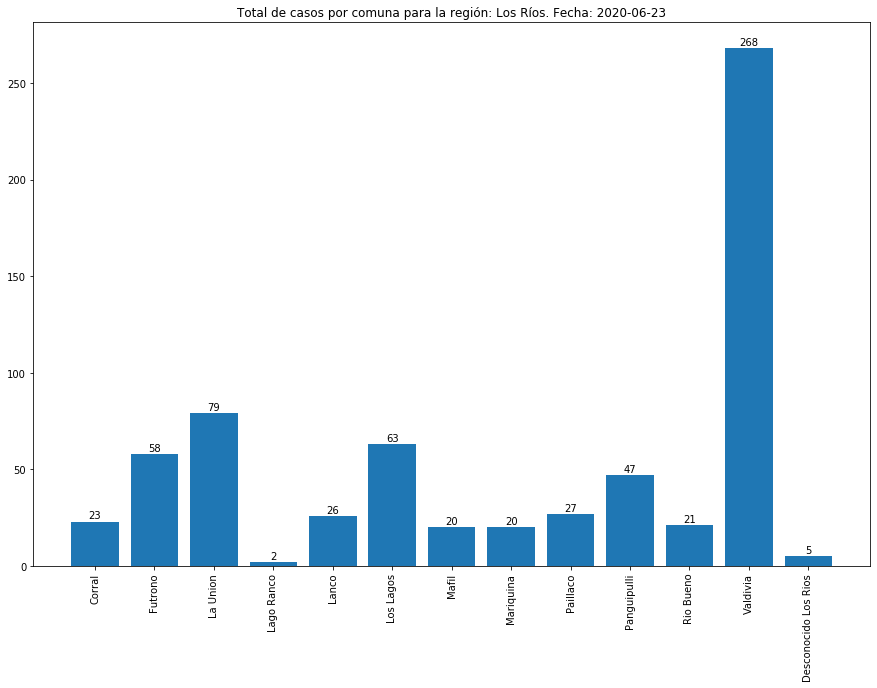

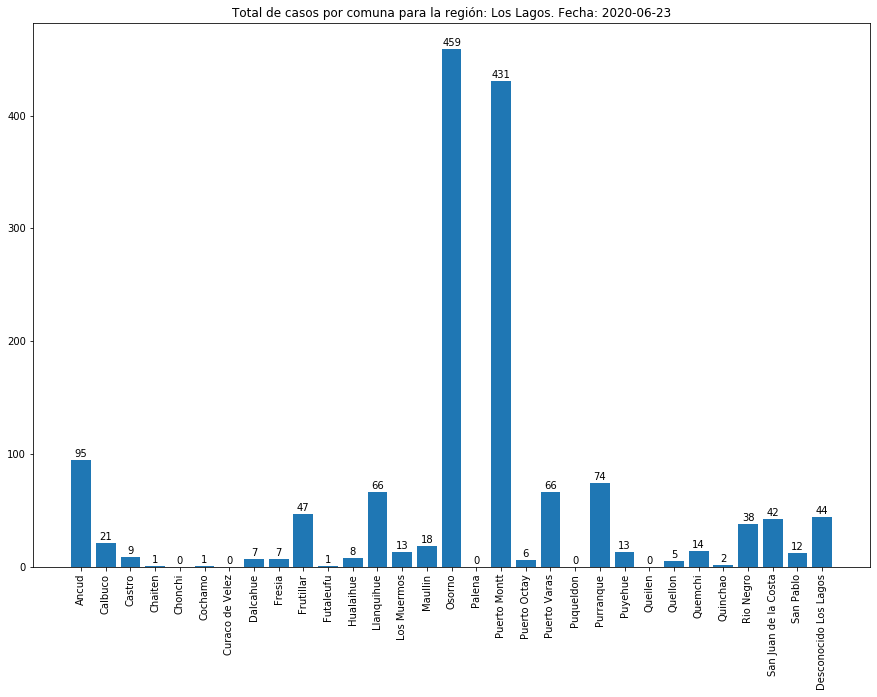

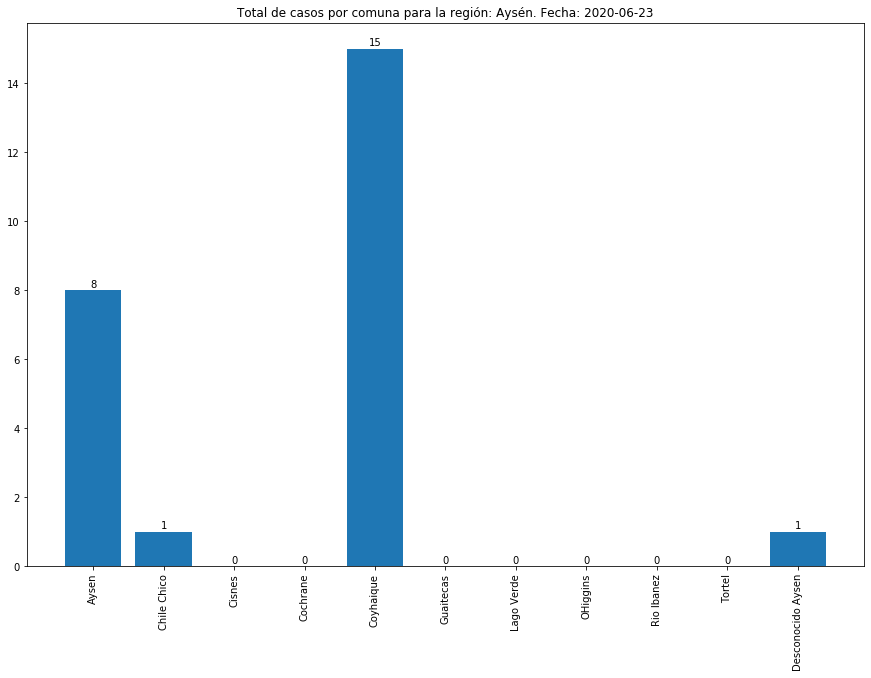

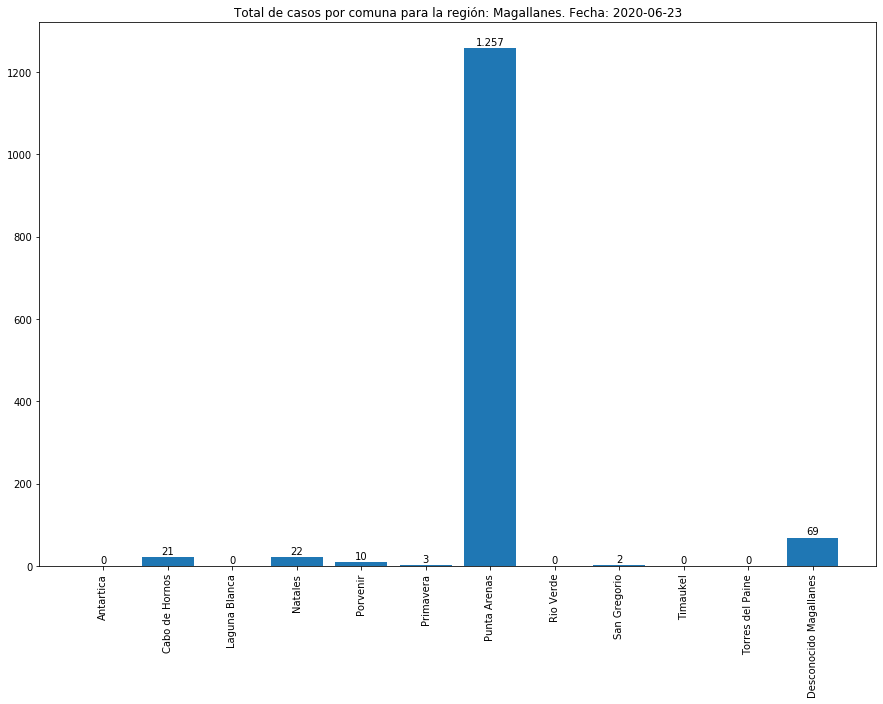

In [4]:
for r in data["Region"].unique():
    cantidad_total_comuna(r)

In [5]:
interact(cantidad_total_comuna,
         searchregion = data["Region"].unique())
None

interactive(children=(Dropdown(description='searchregion', options=('Arica y Parinacota', 'Tarapacá', 'Antofag…